# Summary

This Jupyter Notebook documents the process of clustering student profiles to identify meaningful patterns that can inform personalized learning strategies and targeted academic interventions. The analysis includes:

1. **Problem Definition & Background**: 
    - Identifying the need for clustering student data to support personalized education.
    - Highlighting the importance and key stakeholders of the project.

2. **Data Preparation**:
    - Importing necessary libraries.
    - Loading and exploring the dataset.
    - Handling missing values and encoding categorical variables.
    - Normalizing the data for clustering.

3. **Exploratory Data Analysis (EDA)**:
    - Visualizing the distribution of numerical features.
    - Analyzing the correlation matrix and pairplots.

4. **Clustering Methods**:
    - **KMeans Clustering**:
      - Determining the optimal number of clusters using the elbow method and silhouette scores.
      - Visualizing cluster centroids and distributions.
    - **Hierarchical Clustering**:
      - Creating a dendrogram to visualize the hierarchical structure.
      - Determining the optimal number of clusters and analyzing cluster means.
    - **DBSCAN Clustering**:
      - Performing grid search for optimal parameters.
      - Visualizing cluster means and distributions.

5. **Comparison of Clustering Methods**:
    - Evaluating the performance of KMeans, Hierarchical, and DBSCAN clustering based on silhouette scores.
    - Discussing the strengths and weaknesses of each method.

6. **Key Takeaways**:
    - KMeans provided the highest silhouette score and most interpretable results.
    - Hierarchical clustering offered good separation but with more clusters.
    - DBSCAN struggled with this dataset, showing poor cluster separation.

Overall, KMeans clustering was identified as the most effective method for this analysis, providing clear groupings and practical insights for personalized education strategies.
```

# Student Profile Clustering: Problem Definition & Background

## High-Level Outline and Brief Background

### Problem Definition

The problem addressed in this project is the need to identify meaningful patterns in student data to inform personalized learning strategies and targeted academic interventions. By applying machine learning clustering techniques to student profiles, we aim to uncover insights that can help educational institutions better understand and support their diverse student populations.

### Importance

This problem is crucial for several reasons:
1. It enables educational institutions to provide more effective, personalized support to students.
2. It can lead to improved student outcomes, including better academic performance and higher retention rates.
3. It allows for more efficient allocation of educational resources by targeting interventions where they are most needed.
4. It has the potential to reduce educational disparities by identifying and addressing the needs of underserved student groups.

### Key Stakeholders

The key stakeholders in this project include:
1. **Students**: As the primary beneficiaries, students stand to gain from more personalized educational experiences and targeted support.
2. **Educators and Administrators**: These stakeholders can use the insights to develop more effective teaching strategies and support programs.
3. **Educational Institutions**: Universities and schools can improve their overall performance metrics and resource allocation.
4. **Policymakers**: Insights from this analysis can inform education policy decisions at local, state, or national levels.
5. **Parents and Guardians**: They have a vested interest in their children's educational success and the support they receive.

## Inputs:
- The dataset will consist of various student data points, including demographics, academic performance, attendance records, and socio-economic factors.

## Outputs:
- The analysis will yield distinct clusters of student profiles that will serve as a strategic tool for understanding learning behaviors and needs
- These insights will inform decision-making around:
- Resource allocation and intervention planning
- Curriculum and teaching method adjustments 
- Student support program development
- Policy recommendations


# EDA

## Importing Libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, 
                             recall_score, f1_score, roc_curve, auc, 
                             precision_recall_curve, silhouette_score)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from mpl_toolkits.mplot3d import Axes3D


## Loading Data

In [71]:
# Hide the root window
Tk().withdraw()

# Prompt the user to select a CSV file
file_path = askopenfilename(title="Select a CSV file", filetypes=[("CSV files", "*.csv")])

# Load the dataset
data = pd.read_csv(file_path)

# Data Overview
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

## Data Overview

In [72]:
# Print the head of the dataset
print("Head of the dataset:\n", data.head())

# Print the description of the dataset
print("Description of the dataset:\n", data.describe())

# Print the data types of each column
print("Data types of each column:\n", data.dtypes)


Head of the dataset:
    Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2               

## Missing Data

In [73]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder              

### Note:

Hard to tell what is missing since all values are numeric, a missing value would be a 0, but 0 is also a valid value for most columns

## Unique Values

In [74]:
# Print all unique values for each column in the dataset
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}':\n", unique_values)

Unique values in column 'Marital status':
 [1 2 4 3 5 6]
Unique values in column 'Application mode':
 [17 15  1 39 18 53 44 51 43  7 42 16  5  2 10 57 26 27]
Unique values in column 'Application order':
 [5 1 2 4 3 6 9 0]
Unique values in column 'Course':
 [ 171 9254 9070 9773 8014 9991 9500 9238 9670 9853 9085 9130 9556 9147
 9003   33 9119]
Unique values in column 'Daytime/evening attendance':
 [1 0]
Unique values in column 'Previous qualification':
 [ 1 19 42 39 10  3 40  2  4 12 43 15  6  9 38  5 14]
Unique values in column 'Previous qualification (grade)':
 [122.  160.  100.  133.1 142.  119.  137.  138.  139.  136.  133.  110.
 149.  127.  135.  140.  125.  126.  151.  115.  150.  143.  130.  120.
 103.  154.  132.  167.  129.  141.  116.  148.  118.  106.  121.  114.
 124.  123.  113.  111.  131.  158.  146.  117.  153.  178.   99.  134.
 128.  170.  155.  145.  152.  112.  107.  156.  188.   96.  161.  166.
 147.  144.  102.  101.  180.  172.  105.  108.  165.  190.  162.  164.

## Categorical Columns

In [75]:
# Check for categorical columns in the dataset
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Print unique values for each categorical column
for column in categorical_columns:
    unique_values = data[column].unique()
    print(f"Unique values in categorical column '{column}':\n", unique_values)

# Optionally, you can encode categorical variables if needed
# For example, using one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


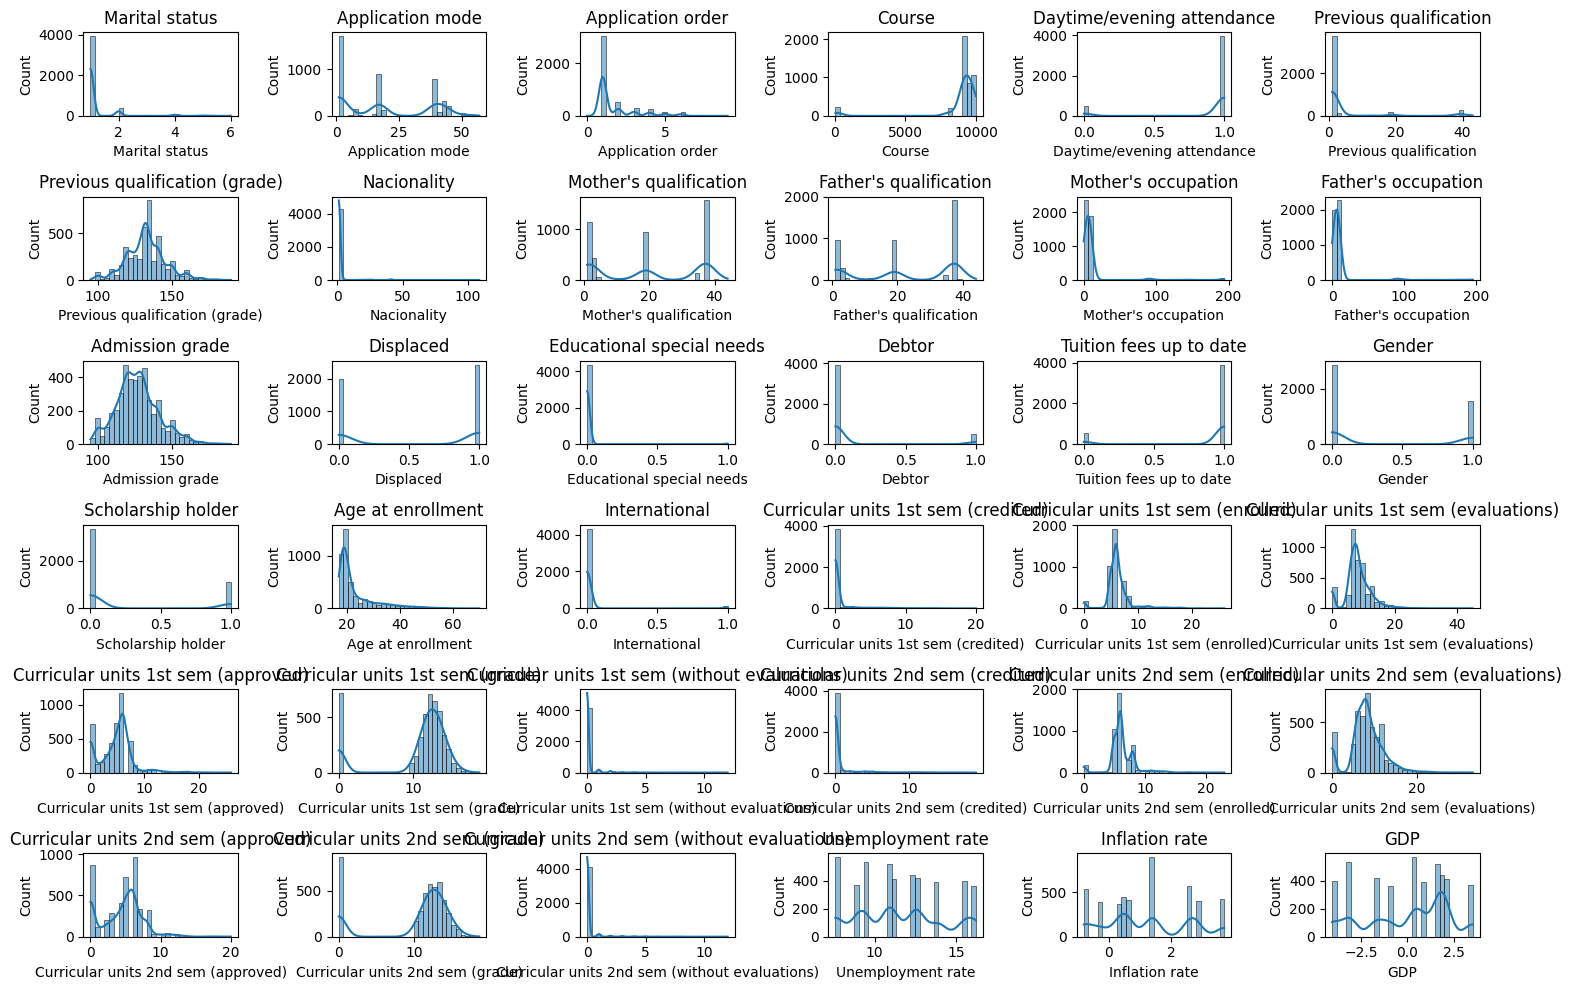

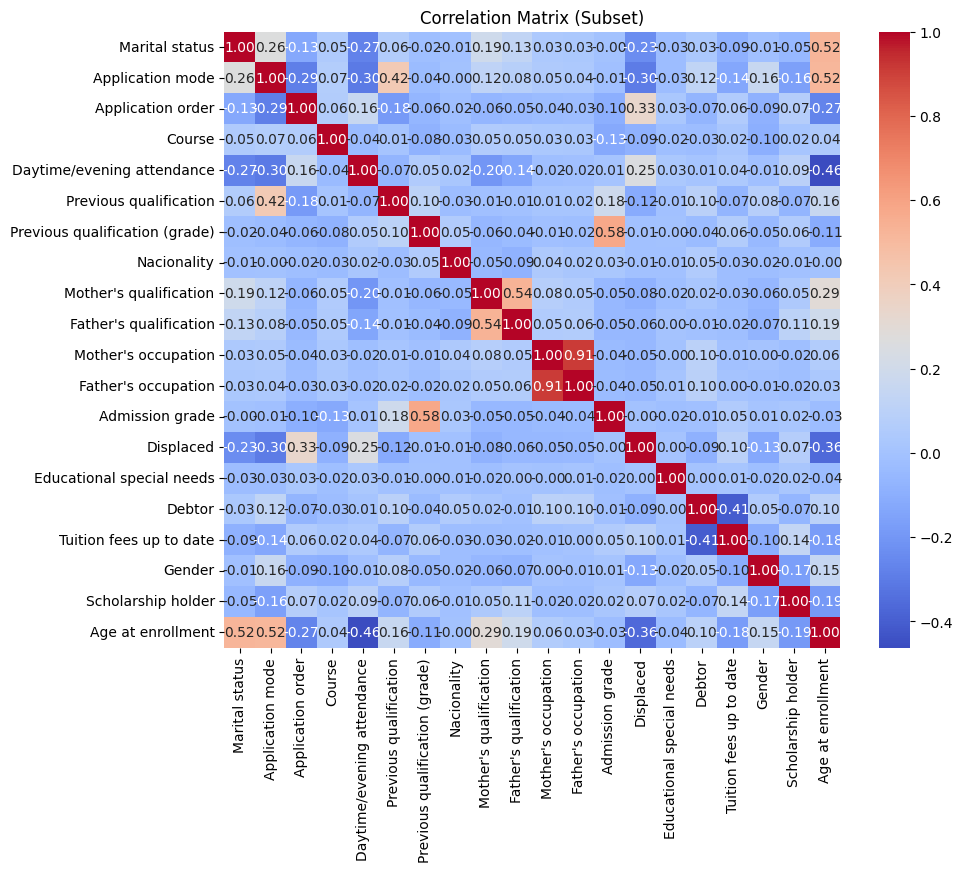

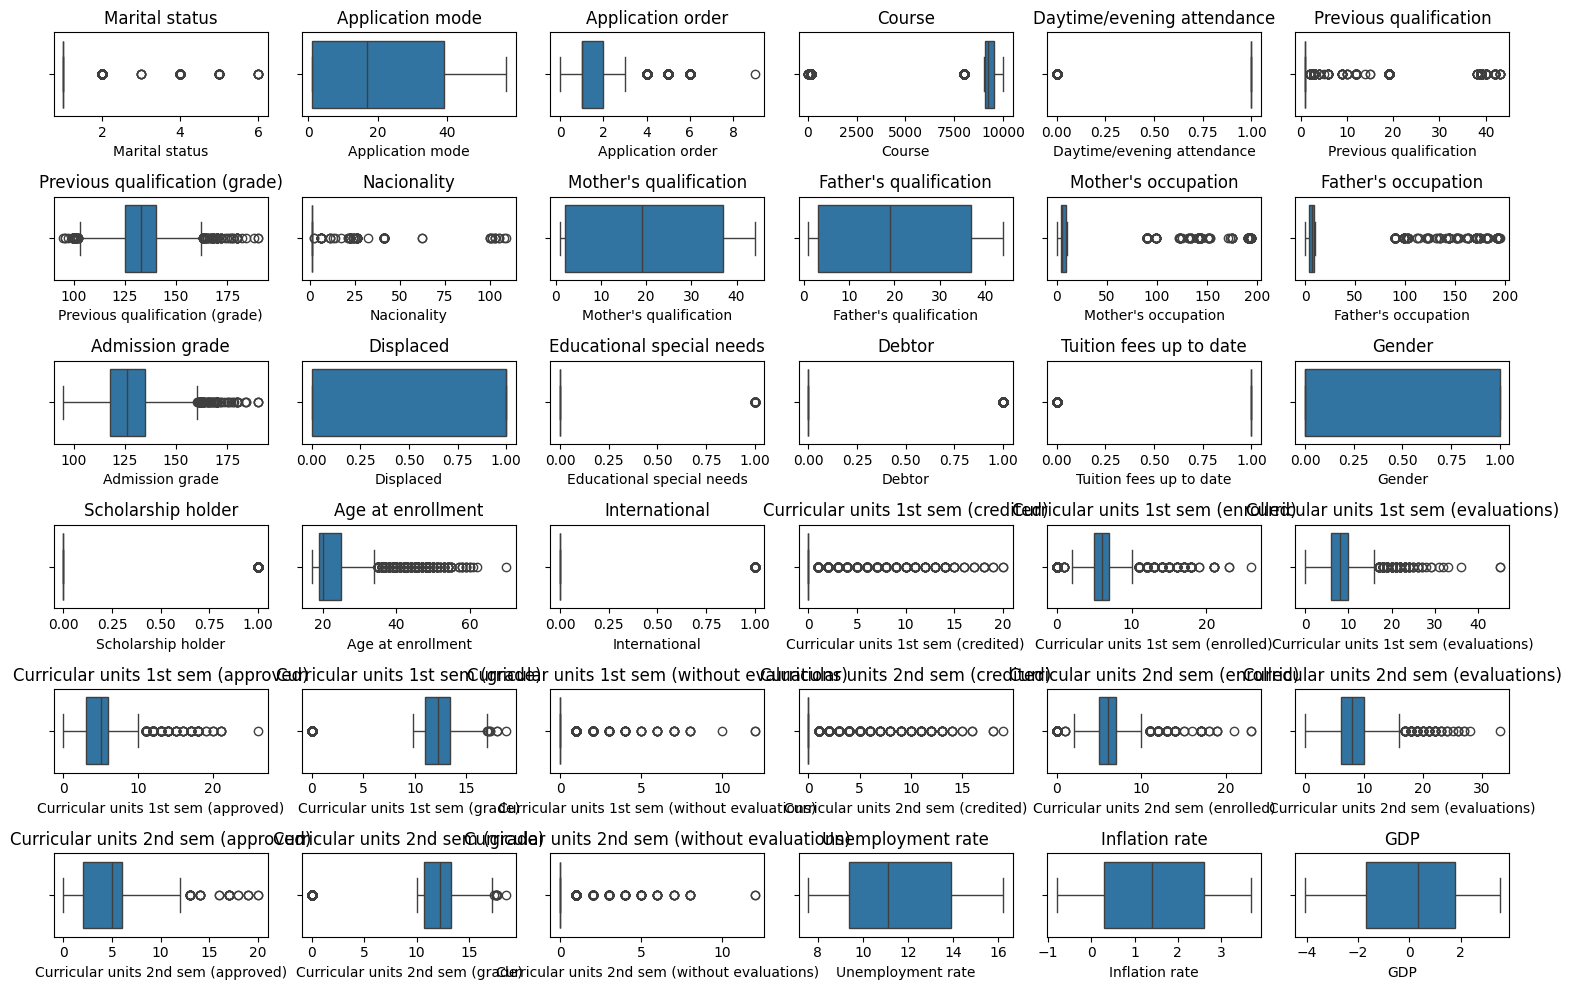

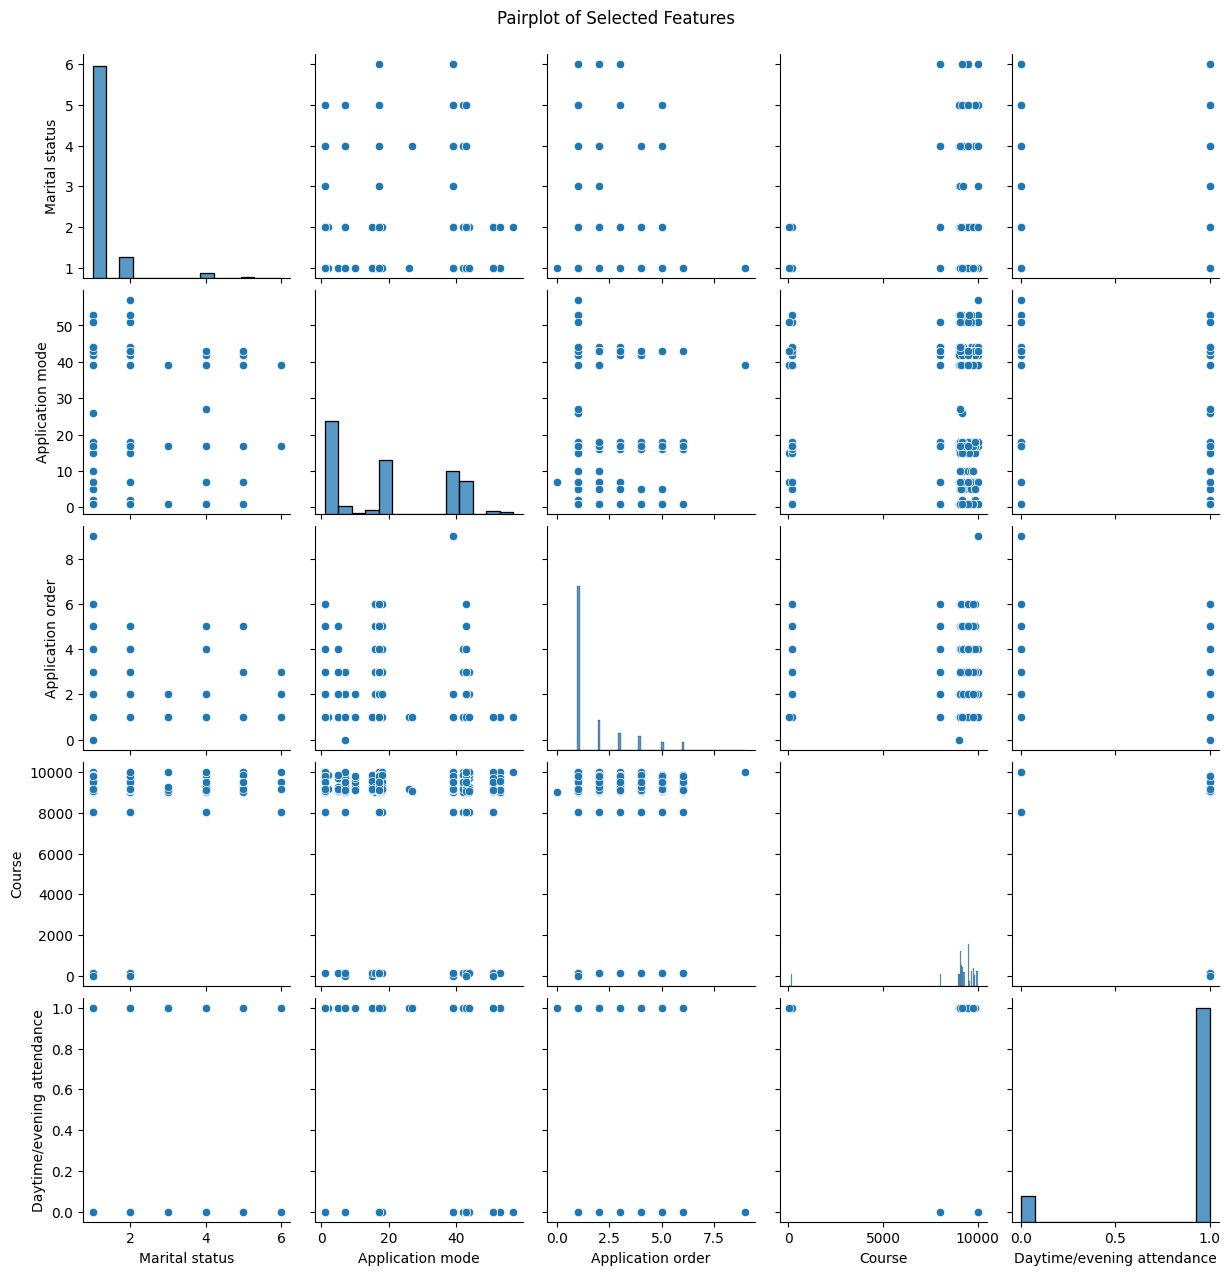

In [76]:
# Exploratory Data Analysis (EDA)

# Visualizing the distribution of numerical features
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(6, 6, i + 1)
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

# Visualizing the correlation matrix with fewer features
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
# Select a subset of features for the heatmap
subset_corr_matrix = correlation_matrix.loc[numerical_features[:20], numerical_features[:20]]  # Adjust the number of features as needed
sns.heatmap(subset_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix (Subset)')
plt.show()

# Visualizing boxplots for numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(6, 6, i + 1)
    sns.boxplot(x=data[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

# Visualizing pairplot for a subset of numerical features
subset_features = numerical_features[:5]  # Adjust the number of features as needed
sns.pairplot(data[subset_features])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()


## Normalization

In [77]:
# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)


# KMeans Model

## Optimal K

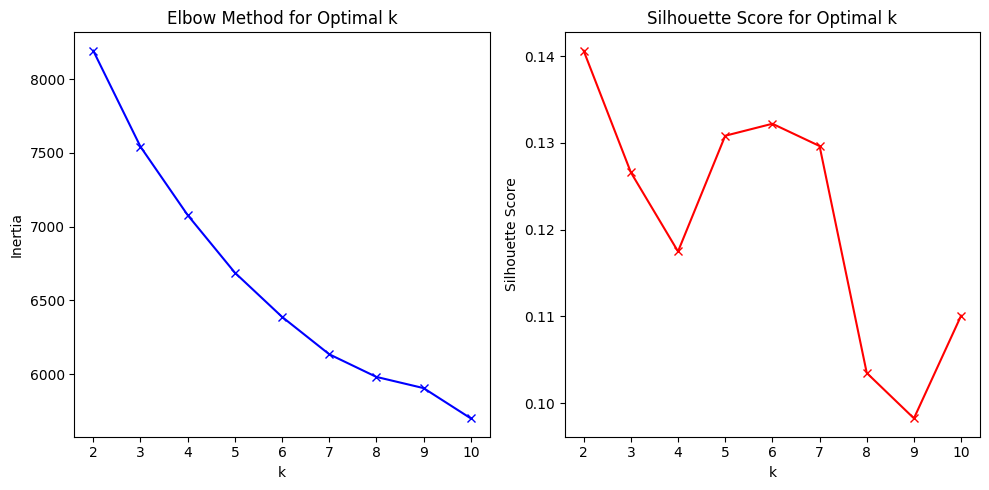

In [78]:
# Calculate inertia (within-cluster sum of squares) for different K values
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_normalized, kmeans.labels_))

# Plot elbow curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.tight_layout()
plt.show()

## KMeans Modelling

## KMeans Clustering, Centroid Information

The silhouette score for 6 clusters is: 0.132

Centroid Information:
   Marital status  Application mode  Application order    Course  \
0        0.009381          0.217720           0.236398  0.885944   
1        0.012840          0.193474           0.222359  0.913755   
2        0.012733          0.279420           0.221014  0.817603   
3        0.045755          0.438926           0.135731  0.896213   
4        0.088354          0.414986           0.136709  0.913912   
5        0.066348          0.463519           0.173164  0.868950   

   Daytime/evening attendance  Previous qualification  \
0                    0.962477                0.055012   
1                    0.987654                0.040065   
2                    0.948758                0.082372   
3                    0.834532                0.128948   
4                    0.712658                0.111242   
5                    0.861575                0.131776   

   Previous qualification (grade)  Nacionality  Mother

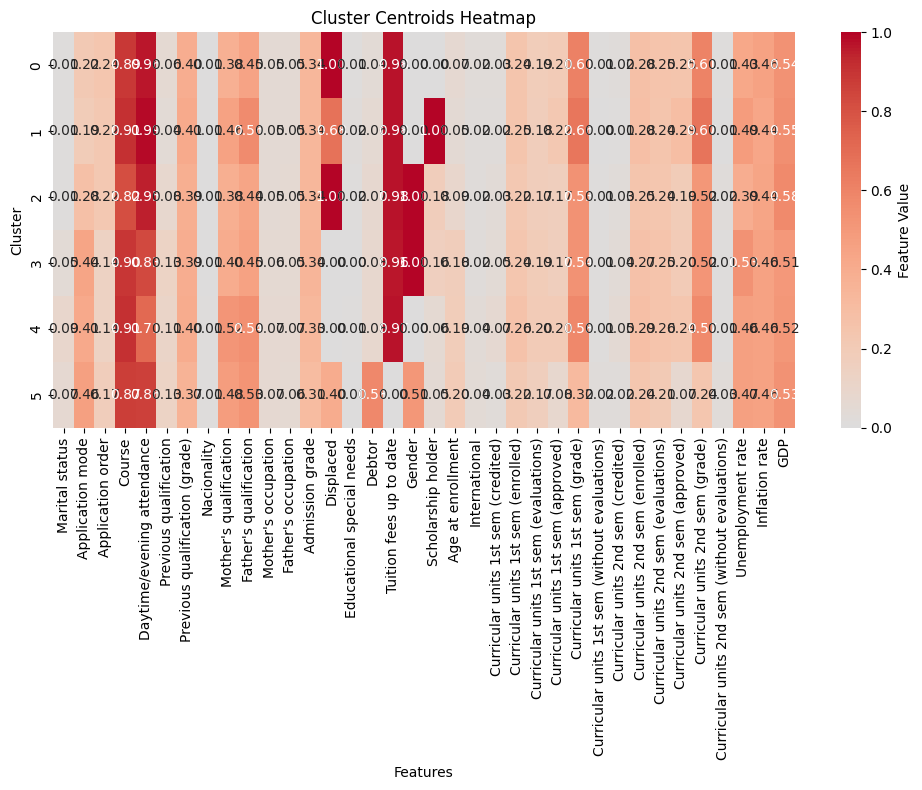

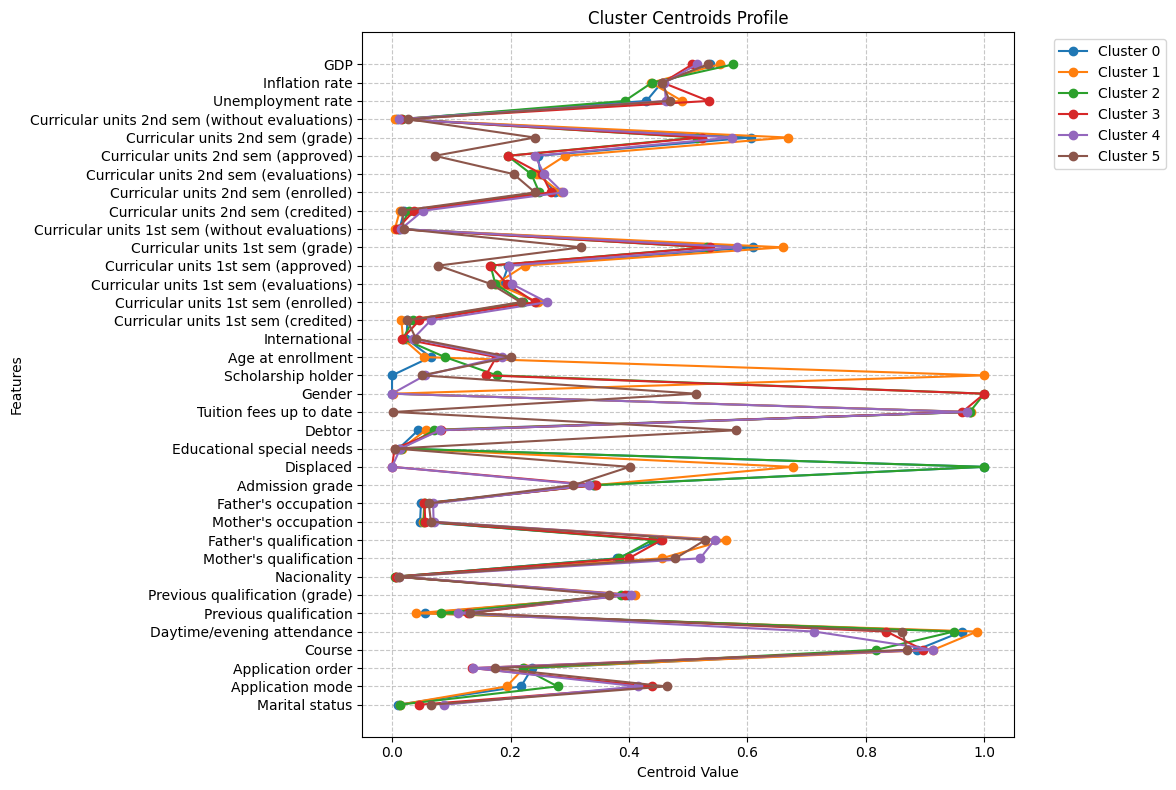

In [79]:
# Based on the elbow curve and silhouette scores
optimal_k = 6

# Create and fit KMeans model with optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(data_normalized)

# Calculate silhouette score
silhouette_avg = silhouette_score(data_normalized, cluster_labels)
print(f"The silhouette score for {optimal_k} clusters is: {silhouette_avg:.3f}")

# Display centroid information
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=data_normalized.columns)
print("\nCentroid Information:")
print(centroids)

# Create heatmap visualization of centroids
plt.figure(figsize=(10, 8))
sns.heatmap(centroids, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', cbar_kws={'label': 'Feature Value'})
plt.title('Cluster Centroids Heatmap')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.tight_layout()
plt.show()

# Create bar chart visualization of centroids
plt.figure(figsize=(12, 8))
for i in range(len(centroids)):
    plt.plot(centroids.iloc[i], centroids.columns,
             marker='o', linestyle='-',
             label=f'Cluster {i}')
plt.yticks(rotation=0)
plt.ylabel('Features') 
plt.xlabel('Centroid Value')
plt.title('Cluster Centroids Profile')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Cluster Distribution

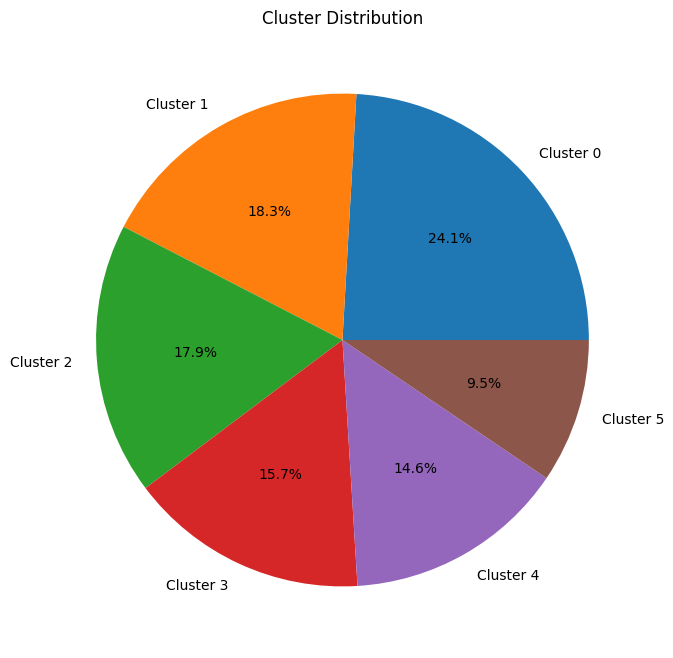

In [80]:
# Show cluster distribution with pie chart
cluster_sizes = pd.Series(cluster_labels).value_counts()
plt.figure(figsize=(8, 8))
plt.pie(cluster_sizes, labels=[f'Cluster {i}' for i in range(optimal_k)], autopct='%1.1f%%')
plt.title('Cluster Distribution')
plt.show()


## Visualization

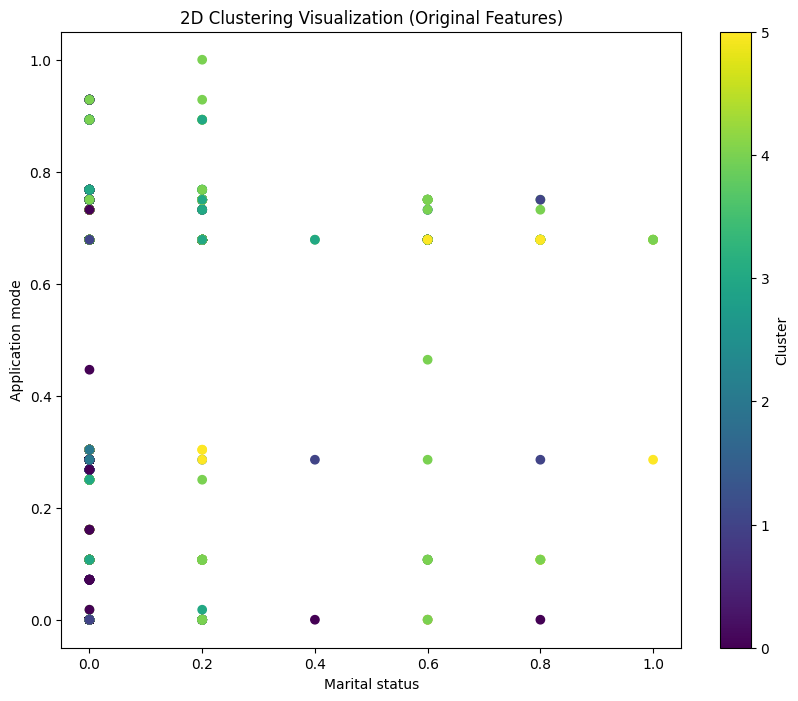

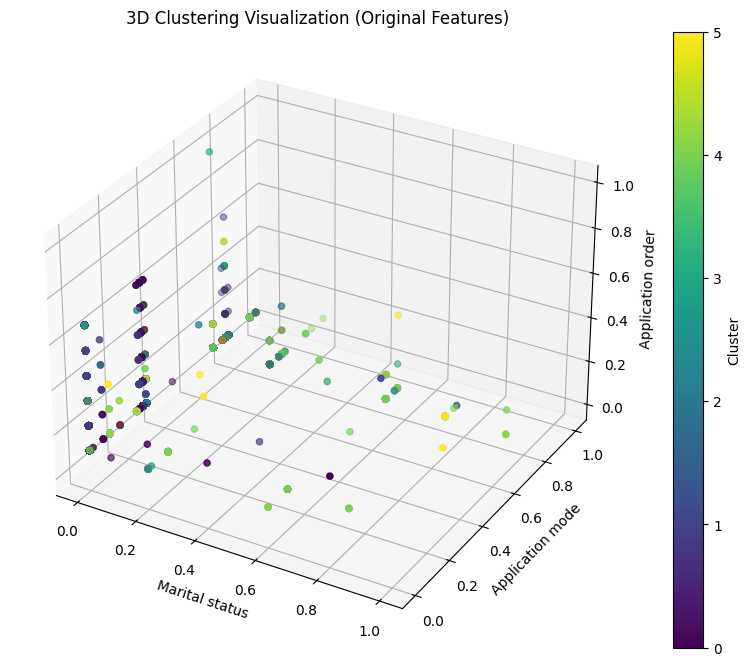

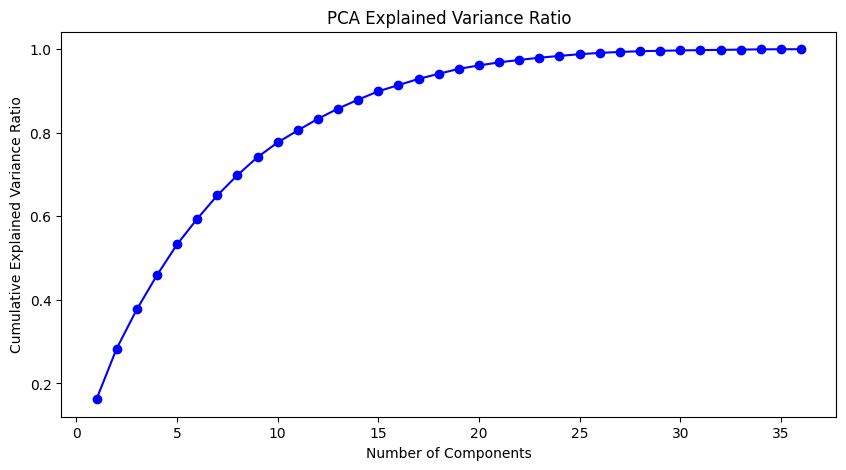

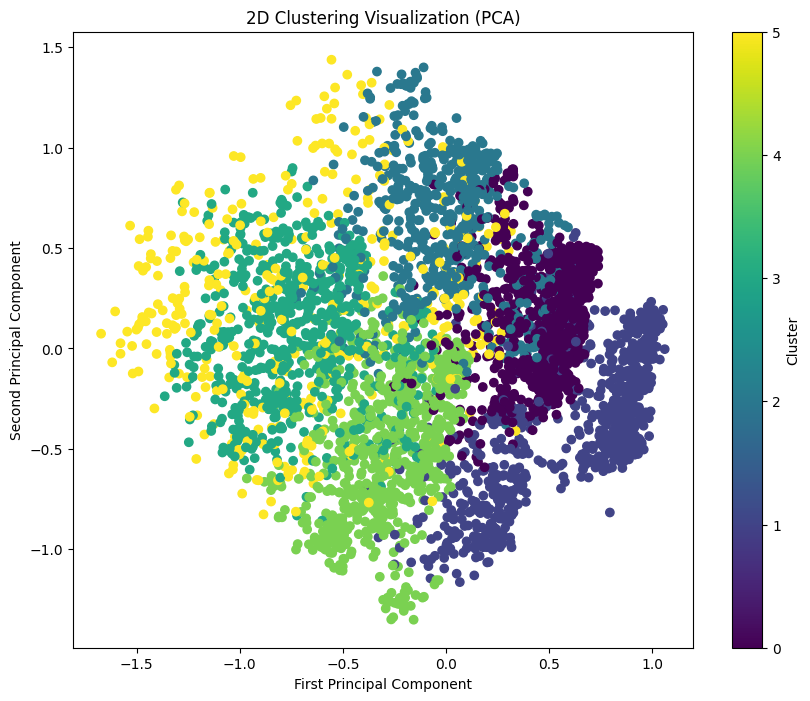

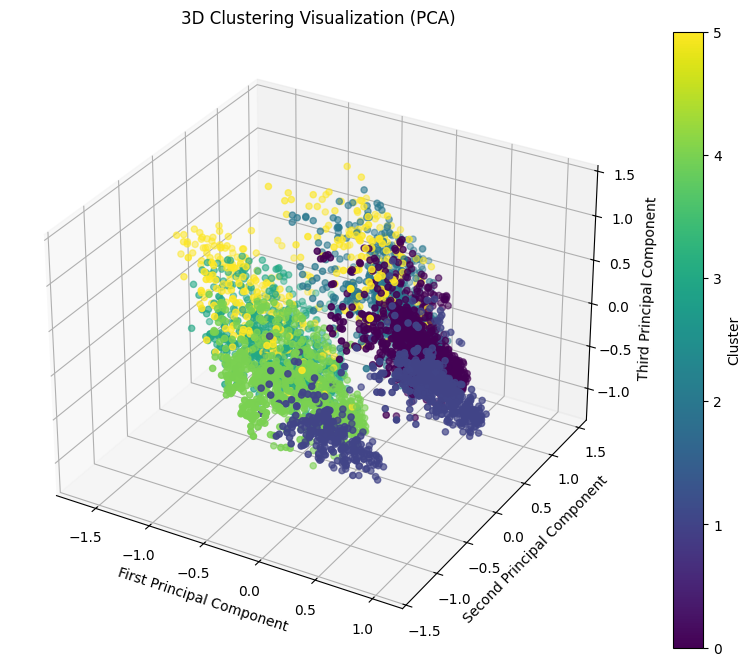


Explained Variance Ratio for first 3 PCA components:
PC1: 0.162
PC2: 0.121
PC3: 0.094


In [81]:
# 2D visualization using original features
selected_features_2d = data_normalized.columns[:2]

plt.figure(figsize=(10, 8))
plt.scatter(data_normalized[selected_features_2d[0]], data_normalized[selected_features_2d[1]], 
           c=cluster_labels, cmap='viridis')
plt.xlabel(selected_features_2d[0])
plt.ylabel(selected_features_2d[1])
plt.title('2D Clustering Visualization (Original Features)')
plt.colorbar(label='Cluster')
plt.show()

# 3D visualization using original features
selected_features_3d = data_normalized.columns[:3]
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_normalized[selected_features_3d[0]], 
                    data_normalized[selected_features_3d[1]], 
                    data_normalized[selected_features_3d[2]], 
                    c=cluster_labels, cmap='viridis')
ax.set_xlabel(selected_features_3d[0])
ax.set_ylabel(selected_features_3d[1])
ax.set_zlabel(selected_features_3d[2])
plt.colorbar(scatter, label='Cluster')
plt.title('3D Clustering Visualization (Original Features)')
plt.show()

# PCA visualization
# Perform PCA
pca = PCA()
data_pca = pca.fit_transform(data_normalized)

# Plot explained variance ratio
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio')
plt.show()

# 2D PCA visualization
plt.figure(figsize=(10, 8))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2D Clustering Visualization (PCA)')
plt.colorbar(label='Cluster')
plt.show()

# 3D PCA visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], 
                    c=cluster_labels, cmap='viridis')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.colorbar(scatter, label='Cluster')
plt.title('3D Clustering Visualization (PCA)')
plt.show()

# Print explained variance ratios for the first 3 components
print("\nExplained Variance Ratio for first 3 PCA components:")
for i, ratio in enumerate(pca.explained_variance_ratio_[:3]):
    print(f"PC{i+1}: {ratio:.3f}")

### Key takeaways:

- KMeans with 6 clusters provided the most interpretable results:
   - Best silhouette score
   - Clear groupings with moderate separation
   - Reasonable number of clusters for practical use

The clustering is much clearer, with distinct and separable groups. This simpler model likely represents the data better and avoids overfitting.



# Hierarchical Clustering

## Hierarchical Clustering Creation

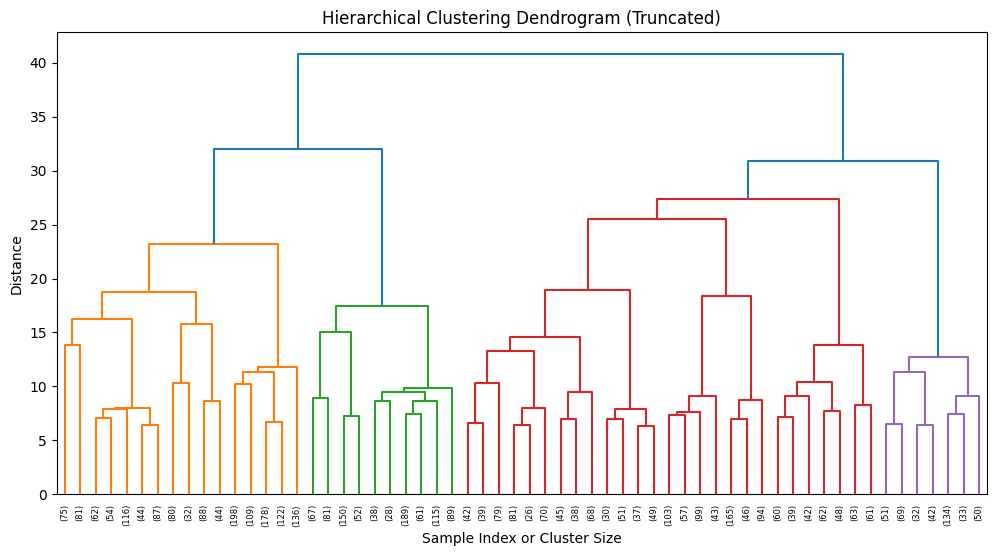

In [82]:
# Hierarchical Clustering Creation
linked = linkage(data_normalized, method='ward')

# Draw a dendrogram with truncation
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True,
          truncate_mode='lastp',  # Truncate the dendrogram
          p=60,  # Show only the last p merged clusters
          leaf_rotation=90)  # Rotate labels for better readability
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()




## Determine Number of Clusters

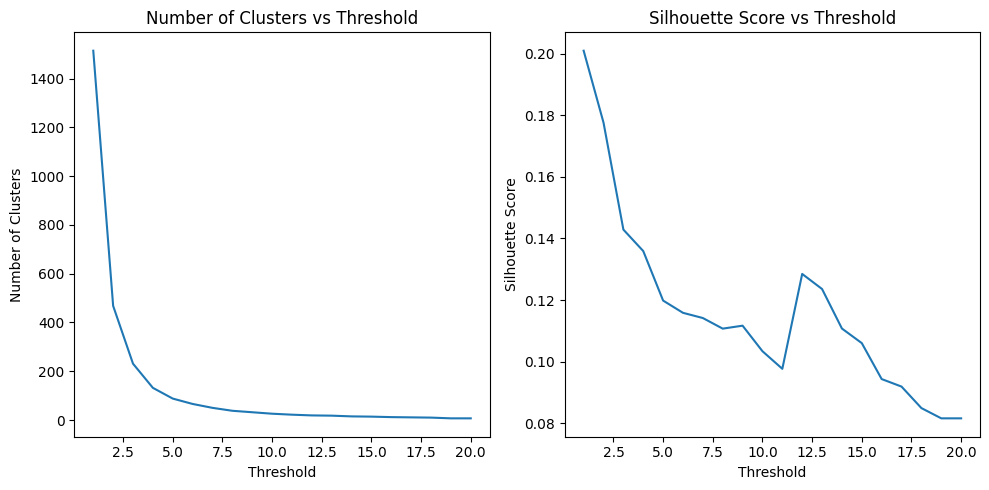

Silhouette Score for 1514 clusters: 0.201


In [83]:
# Determine Number of Clusters
# Calculate distances for different thresholds
thresholds = np.linspace(1, 20, 20)
n_clusters = []
silhouette_scores = []

for t in thresholds:
    clusters_t = fcluster(linked, t, criterion='distance')
    n_clusters.append(len(np.unique(clusters_t)))
    if len(np.unique(clusters_t)) > 1:  # Silhouette requires at least 2 clusters
        silhouette_scores.append(silhouette_score(data_normalized, clusters_t))
    else:
        silhouette_scores.append(0)

# Plot number of clusters vs threshold
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(thresholds, n_clusters)
plt.xlabel('Threshold')
plt.ylabel('Number of Clusters')
plt.title('Number of Clusters vs Threshold')

# Plot silhouette scores vs threshold
plt.subplot(1, 2, 2)
plt.plot(thresholds, silhouette_scores)
plt.xlabel('Threshold')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Threshold')
plt.tight_layout()
plt.show()

# Choose threshold where silhouette score is highest
optimal_threshold = thresholds[np.argmax(silhouette_scores)]
clusters = fcluster(linked, optimal_threshold, criterion='distance')

# Calculate Silhouette Score
silhouette_avg = silhouette_score(data_normalized, clusters)
print(f'Silhouette Score for {len(set(clusters))} clusters: {silhouette_avg:.3f}')

## Cluster Mean

Silhouette Score for 19 clusters: 0.128

Cluster Means:
    Marital status  Application mode  Application order    Course  \
1         0.159447          0.563858           0.119304  0.894786   
2         0.104124          0.594532           0.131730  0.933481   
3         0.003226          0.279378           0.230287  0.906431   
4         0.090040          0.531232           0.127933  0.912489   
5         0.008525          0.236066           0.246266  0.934140   
6         0.029801          0.413671           0.133554  0.897580   
7         0.003593          0.143713           0.180971  0.013775   
8         0.080795          0.386353           0.178072  0.919315   
9         0.057627          0.424233           0.160075  0.922686   
10        0.026250          0.310268           0.230556  0.923605   
11        0.005385          0.148214           0.260684  0.942543   
12        0.025743          0.212164           0.154565  0.941529   
13        0.005405          0.172901           

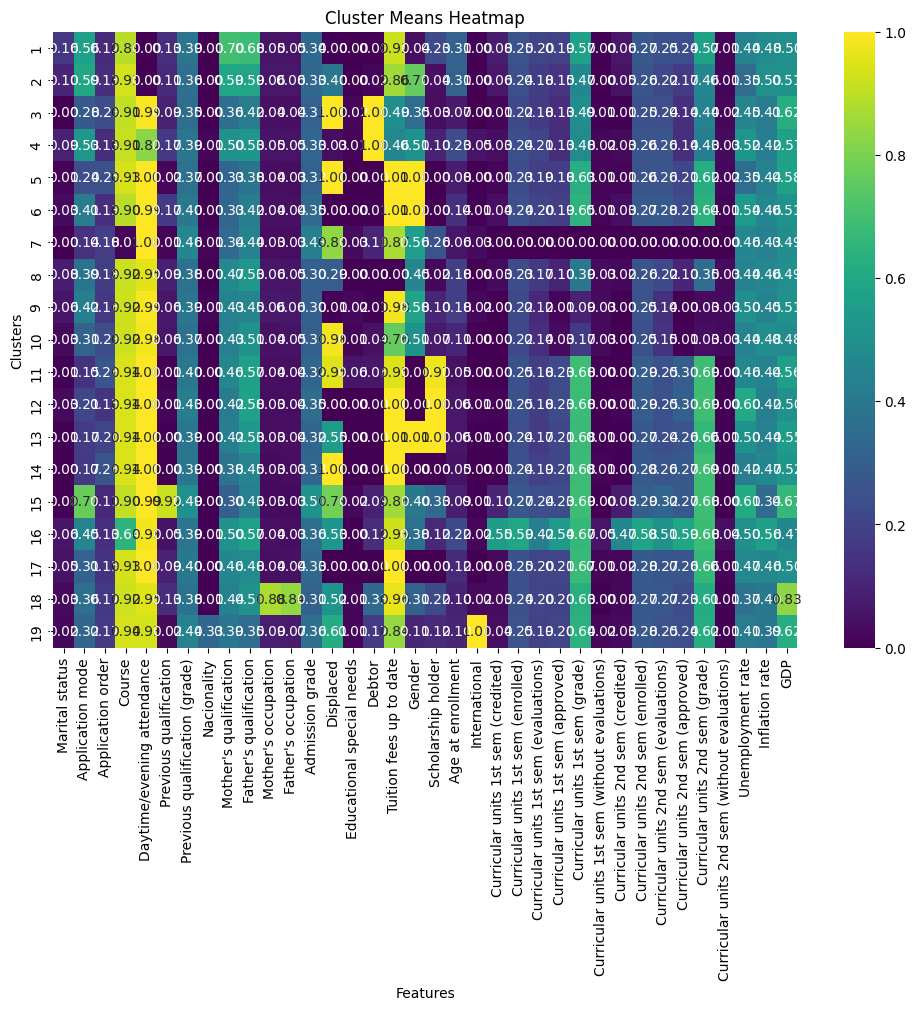

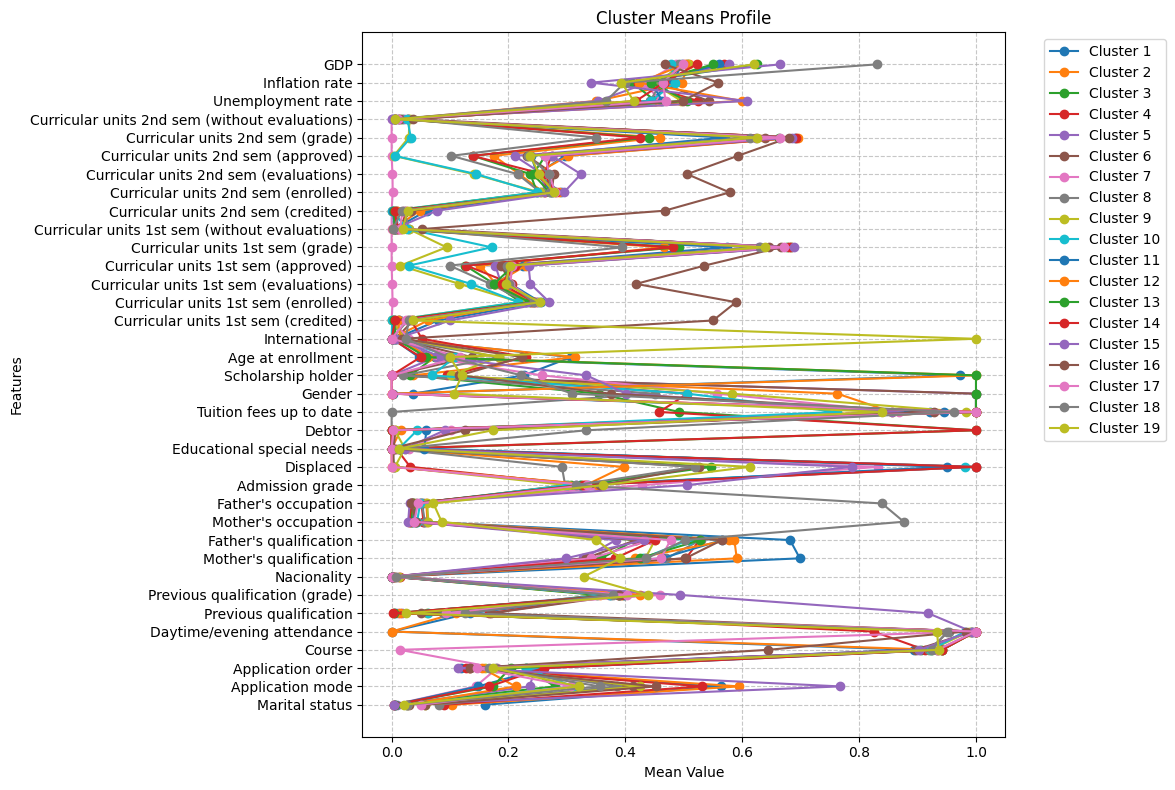

In [84]:
# Determine Number of Clusters
threshold = 12
clusters = fcluster(linked, threshold, criterion='distance')

# Calculate Silhouette Score
silhouette_avg = silhouette_score(data_normalized, clusters)
print(f'Silhouette Score for {len(set(clusters))} clusters: {silhouette_avg:.3f}')

# Cluster Mean
cluster_means = pd.DataFrame(data_normalized).groupby(clusters).mean()
print("\nCluster Means:")
print(cluster_means)

# Visualize cluster means using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means, annot=True, cmap='viridis', fmt='.2f')
plt.title('Cluster Means Heatmap')
plt.xlabel('Features')
plt.ylabel('Clusters')
plt.show()
# Visualize cluster means using a bar chart
plt.figure(figsize=(12, 8))
for i in range(len(cluster_means)):
    plt.plot(cluster_means.iloc[i], cluster_means.columns,
             marker='o', linestyle='-',
             label=f'Cluster {i+1}')
plt.yticks(rotation=0)
plt.ylabel('Features') 
plt.xlabel('Mean Value')
plt.title('Cluster Means Profile')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Distribution

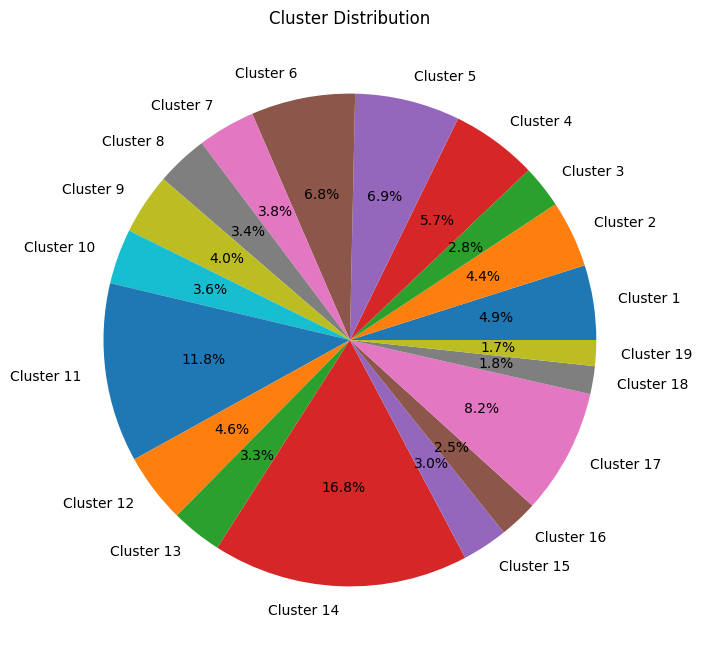

In [85]:

# Cluster Distribution
plt.figure(figsize=(8, 8))
plt.pie([np.sum(clusters == i) for i in range(1, len(set(clusters)) + 1)], 
        labels=[f'Cluster {i}' for i in range(1, len(set(clusters)) + 1)], 
        autopct='%1.1f%%')
plt.title('Cluster Distribution')
plt.show()

## Visualization

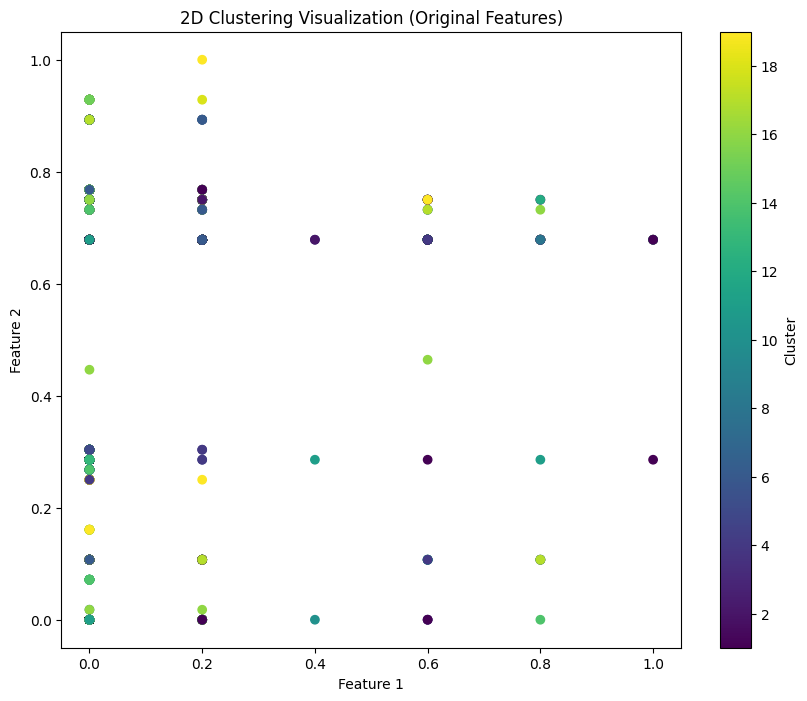

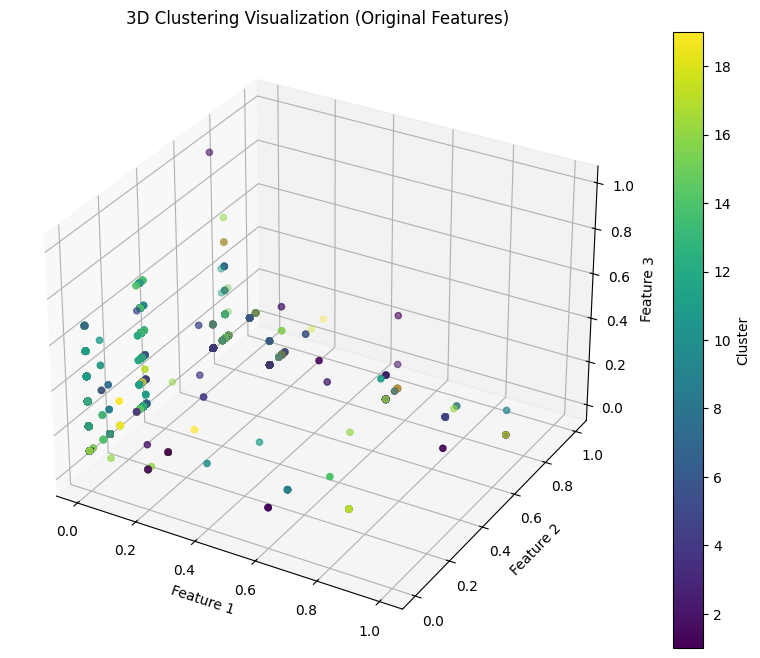

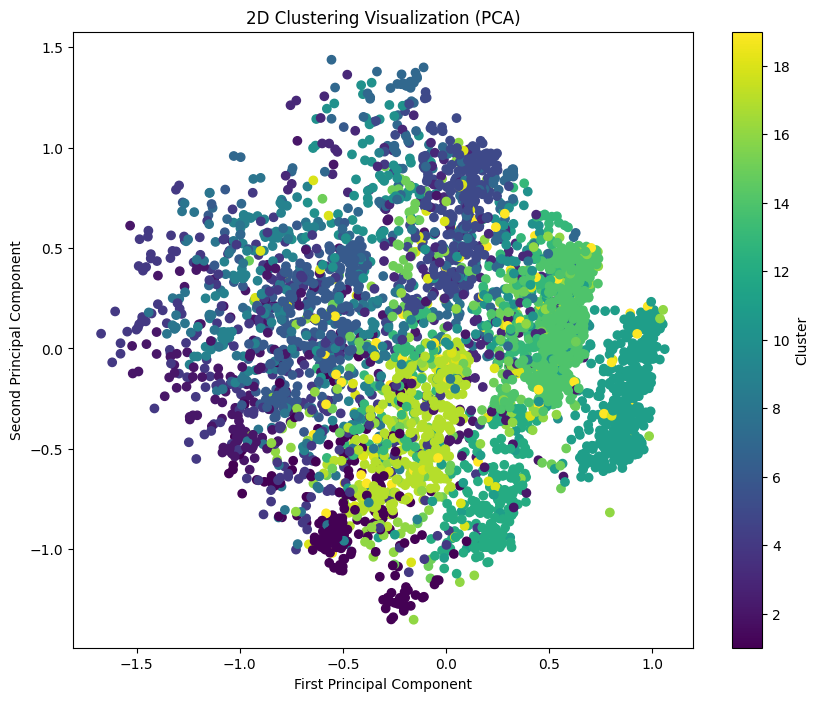

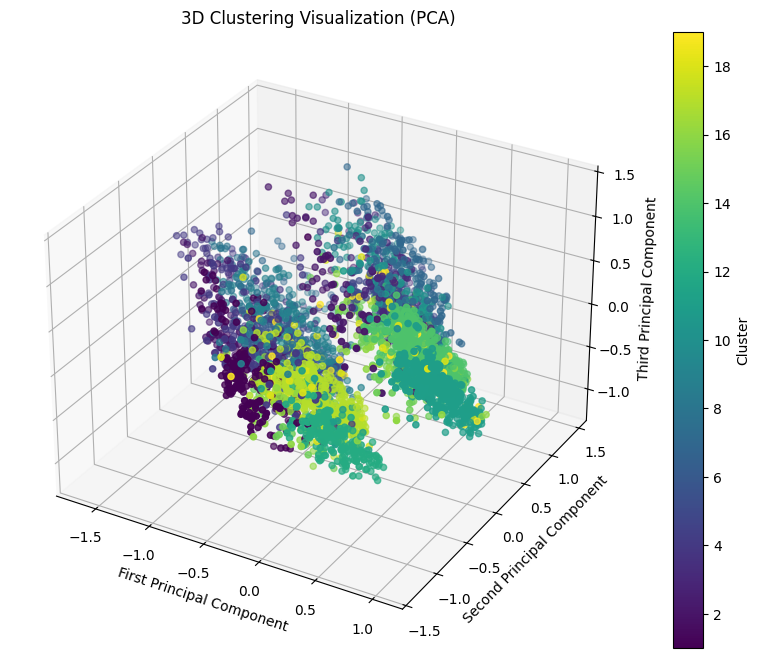

In [86]:

# Visualization (Original Features)
# 2D Visualization using two selected features
plt.figure(figsize=(10, 8))
plt.scatter(data_normalized.iloc[:, 0].values, data_normalized.iloc[:, 1].values, c=clusters, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Clustering Visualization (Original Features)')
plt.colorbar(label='Cluster')
plt.show()

# 3D Visualization using three selected features
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_normalized.iloc[:, 0].values, data_normalized.iloc[:, 1].values, data_normalized.iloc[:, 2].values, 
                     c=clusters, cmap='viridis')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.colorbar(scatter, label='Cluster')
plt.title('3D Clustering Visualization (Original Features)')
plt.show()

# Visualization (PCA)
# 2D PCA visualization
plt.figure(figsize=(10, 8))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2D Clustering Visualization (PCA)')
plt.colorbar(label='Cluster')
plt.show()

# 3D PCA visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], 
                     c=clusters, cmap='viridis')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.colorbar(scatter, label='Cluster')
plt.title('3D Clustering Visualization (PCA)')
plt.show()


### Key takeaways:

- Hierarchical clustering with 19 clusters provided the next best results:
- Silhouette score of 0.128 suggests less clear separation than KMeans
- More clusters leads to finer granularity but also more overlap

- The dendrogram visualization helps identify the number of clusters and their relationships.

# DBSCAN

## Optimal Parameters

In [87]:
# DBSCAN Clustering Analysis

# Grid search for optimal DBSCAN parameters
eps_range = np.arange(0.2, 2.1, 0.2)  # Increased range and step size
min_samples_range = range(10, 51, 10)  # Increased range and step size

best_score = -1
best_eps = None
best_min_samples = None

# Perform grid search
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data_normalized)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Count clusters, excluding noise
        if n_clusters > 1 and n_clusters < 10:  # Aim for fewer clusters
            score = silhouette_score(data_normalized, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f"Best parameters: eps={best_eps}, min_samples={best_min_samples}")
print(f"Best silhouette score: {best_score:.3f}")

Best parameters: eps=1.0, min_samples=40
Best silhouette score: 0.040


## DBSCAN Clustering

Silhouette Score for 10 clusters: 0.040

Cluster Means:
    Marital status  Application mode  Application order    Course  \
-1        0.061975          0.430293           0.158486  0.804787   
 0        0.005596          0.183872           0.255745  0.941386   
 1        0.003913          0.145613           0.269324  0.942964   
 2        0.040625          0.309105           0.146991  0.935162   
 3        0.009467          0.260778           0.236686  0.932772   
 4        0.022772          0.223921           0.152915  0.940641   
 5        0.028660          0.394025           0.138456  0.925652   
 6        0.147917          0.605283           0.115741  0.900733   
 7        0.000000          0.146939           0.266667  0.940007   
 8        0.000000          0.079018           0.141667  0.944306   

    Daytime/evening attendance  Previous qualification  \
-1                    0.771141                0.160908   
 0                    1.000000                0.025663   
 1        

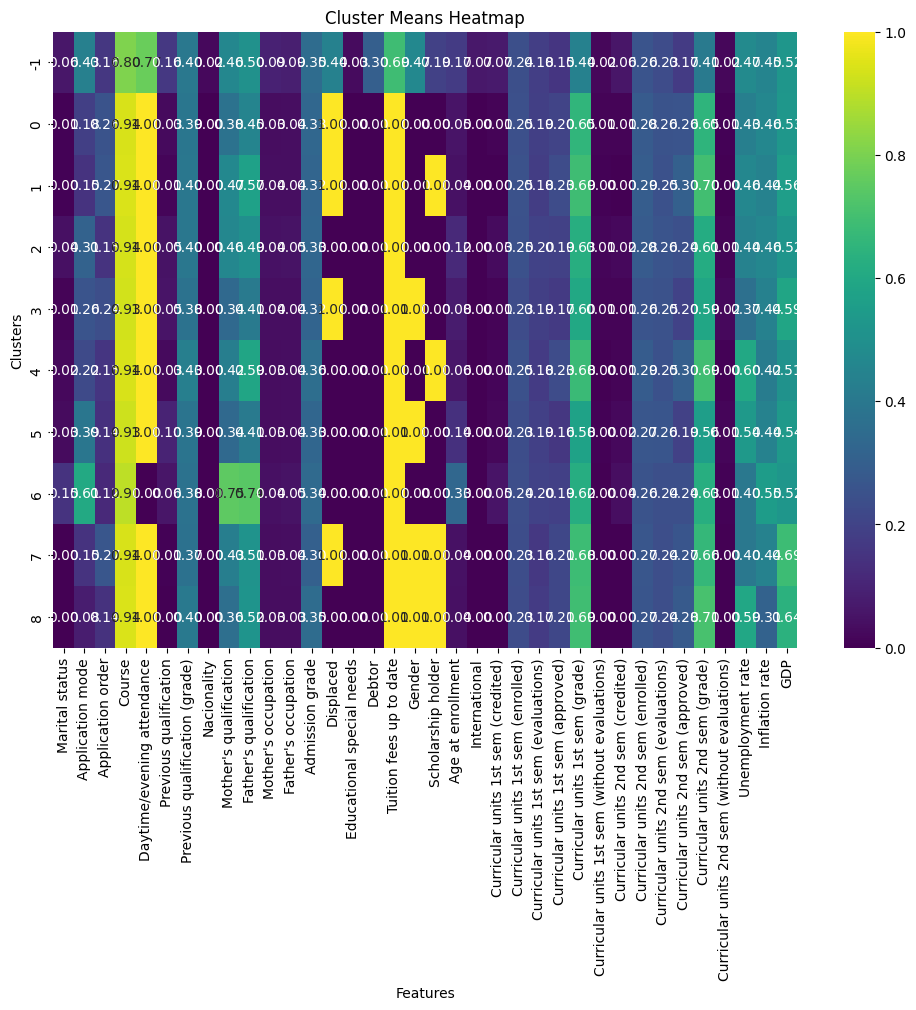

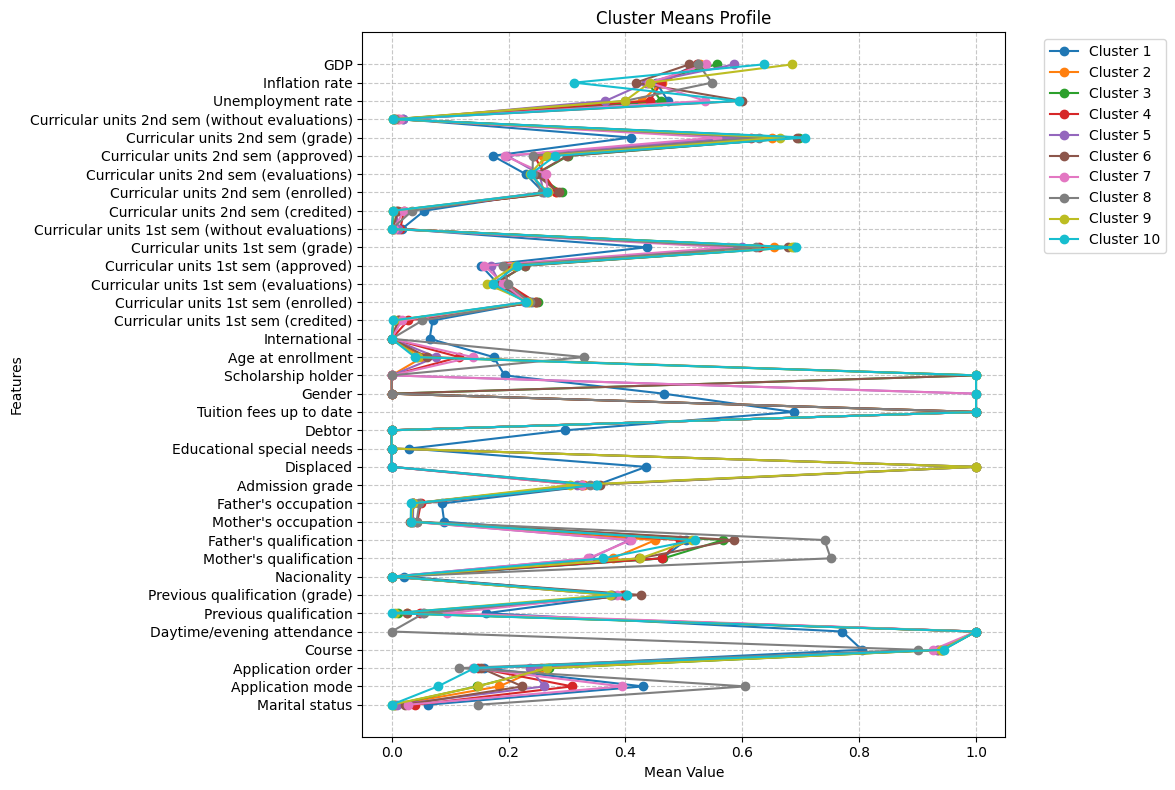

In [88]:
# Create DBSCAN model with optimal parameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)

# Fit the model and predict clusters
clusters = dbscan.fit_predict(data_normalized)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(data_normalized, clusters)
print(f'Silhouette Score for {len(set(clusters))} clusters: {silhouette_avg:.3f}')

# Cluster Mean
cluster_means = pd.DataFrame(data_normalized).groupby(clusters).mean()
print("\nCluster Means:")
print(cluster_means)

# Visualize cluster means using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means, annot=True, cmap='viridis', fmt='.2f')
plt.title('Cluster Means Heatmap')
plt.xlabel('Features')
plt.ylabel('Clusters')
plt.show()

# Visualize cluster means using a bar chart
plt.figure(figsize=(12, 8))
for i in range(len(cluster_means)):
    plt.plot(cluster_means.iloc[i], cluster_means.columns,
             marker='o', linestyle='-',
             label=f'Cluster {i+1}')
plt.yticks(rotation=0)
plt.ylabel('Features') 
plt.xlabel('Mean Value')
plt.title('Cluster Means Profile')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##Cluster Distribution:

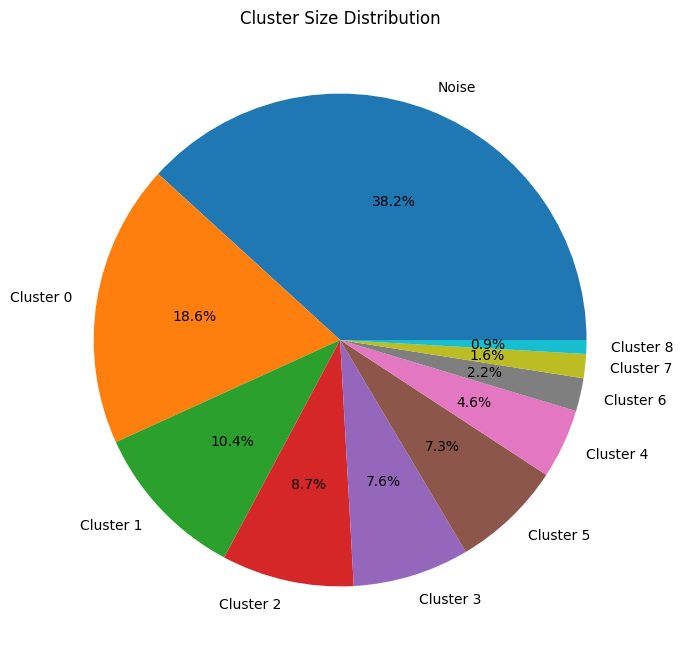

In [89]:
# Cluster distribution pie chart
cluster_sizes = pd.Series(clusters).value_counts()
plt.figure(figsize=(10, 8))
plt.pie(cluster_sizes, labels=[f'Cluster {i}' if i != -1 else 'Noise' for i in cluster_sizes.index], 
        autopct='%1.1f%%')
plt.title('Cluster Size Distribution')
plt.show()

## Visualization

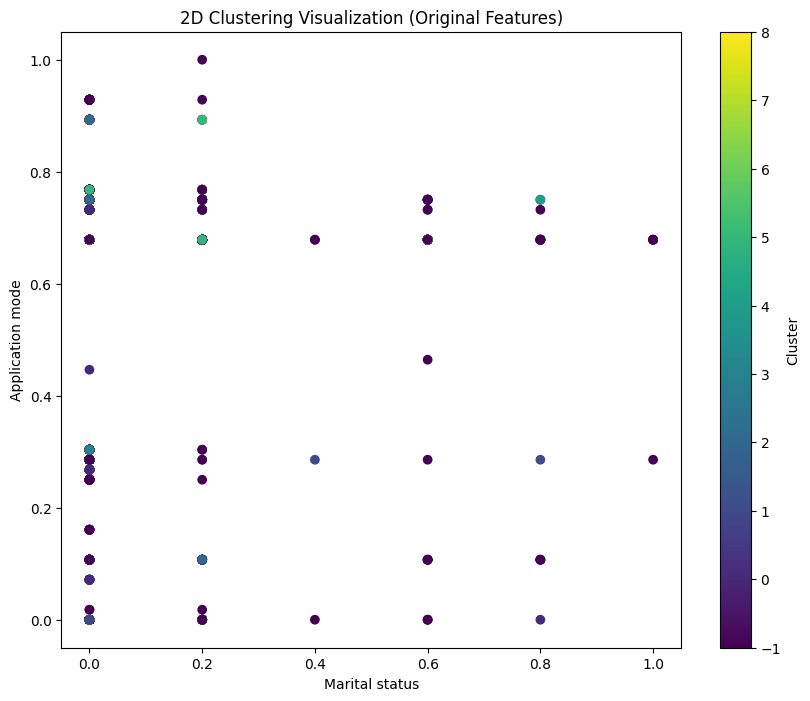

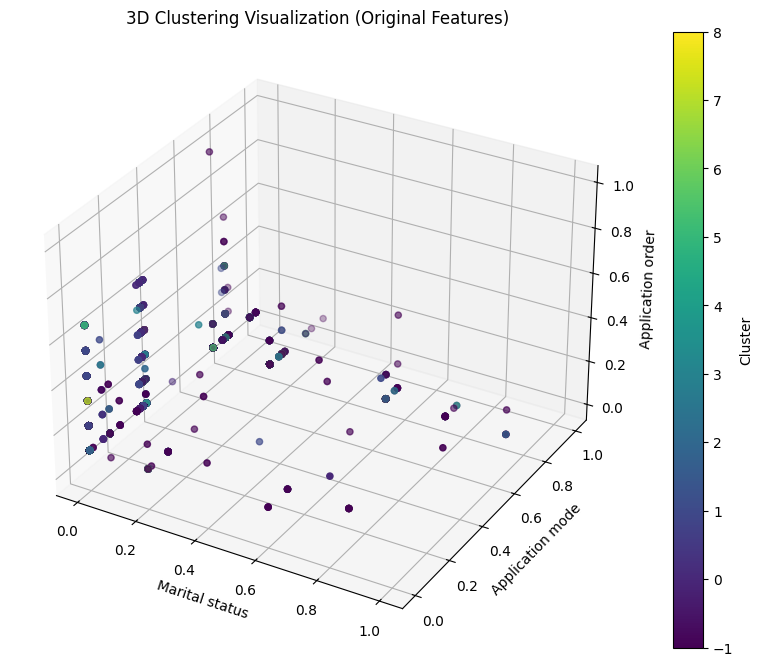

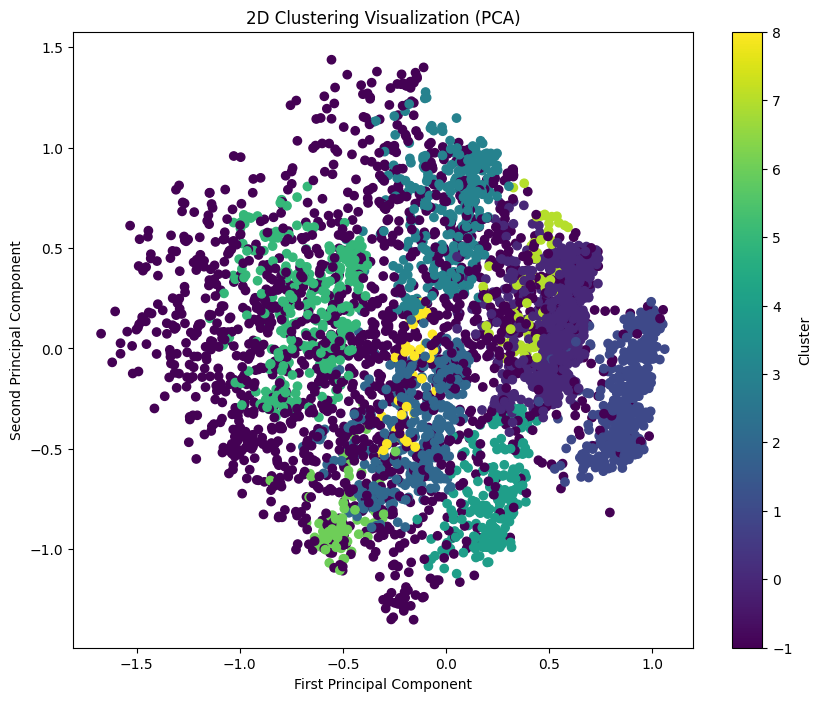

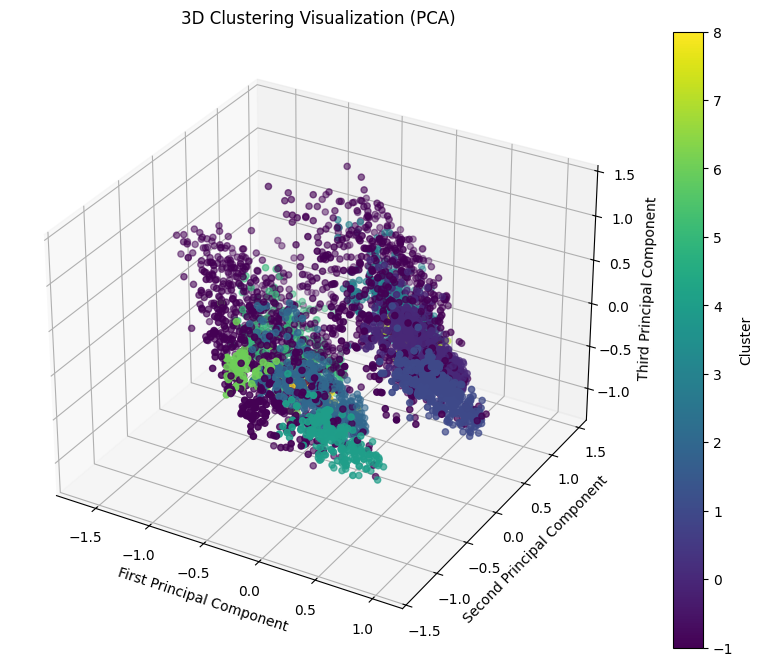

In [90]:

# 2D Visualization using original features
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data_normalized.iloc[:, 0], data_normalized.iloc[:, 1], 
           c=clusters, cmap='viridis')
plt.xlabel(data_normalized.columns[0])
plt.ylabel(data_normalized.columns[1])
plt.title('2D Clustering Visualization (Original Features)')
plt.colorbar(scatter, label='Cluster')
plt.show()
# 3D Visualization using original features
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_normalized.iloc[:, 0], 
                    data_normalized.iloc[:, 1], 
                    data_normalized.iloc[:, 2],
                    c=clusters, cmap='viridis')
ax.set_xlabel(data_normalized.columns[0])
ax.set_ylabel(data_normalized.columns[1])
ax.set_zlabel(data_normalized.columns[2])
plt.colorbar(scatter, label='Cluster')
plt.title('3D Clustering Visualization (Original Features)')
plt.show()
# Apply PCA for visualization
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_normalized)
# 2D PCA visualization
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2D Clustering Visualization (PCA)')
plt.colorbar(scatter, label='Cluster')
plt.show()
# 3D PCA visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], 
                    c=clusters, cmap='viridis')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.colorbar(scatter, label='Cluster')
plt.title('3D Clustering Visualization (PCA)')
plt.show()

### Key takeaways:

- DBSCAN with optimal parameters provided the lowest silhouette score:
   - Silhouette score of 0.040 indicates poor cluster separation
   - Density-based approach identified clusters of varying shapes but with significant overlap


## KMeans: 

The silhouette score for 6 clusters is: 0.132

## Hierarchichal: 

Silhouette Score for 14 clusters: 0.128

## DBSCAN: 

Silhouette Score for DBSCAN clustering: 0.040

## Overall, KMeans has the highest silhouette score at 0.132, followed by Hierarchichal at 0.128, and DBSCAN at 0.040.

# How well are the clusters separated in each method?

Based on the silhouette scores and visualizations:

KMeans (6 clusters):
- Highest silhouette score of 0.132 indicates moderate cluster separation
- Visualizations show some distinct groupings but with overlap between clusters

Hierarchical (14 clusters): 
- Silhouette score of 0.128 suggests a bit less  separation than KMeans, but more clusters
- More clusters leads to finer granularity but also more overlap

DBSCAN:
- Silhouette score of 0.040 indicates poor cluster separation
- Density-based approach identified clusters of varying shapes but with significant overlap

Overall, while KMeans achieved the best separation, all methods show relatively low silhouette scores (<0.25),
suggesting that the underlying data structure does not form strongly distinct, well-separated clusters.

# What information is most useful?

Based on the clustering results and analysis, KMeans provides the most interpretable results; it has a great silhouette score, visible clear groupings with moderate separation and have a reasonable number of clusters for practical use

# Which method produced the highest silhouette score?

KMeans produced the highest silhouette score at 0.132, compared to Hierarchical (0.128) and DBSCAN (0.040).


# What are the strengths and weaknesses of each method based on your results?

## KMeans Clustering:
- Strengths: 
  - Produced the highest silhouette score (0.132), indicating better cluster separation compared to other methods.
  - Created well-balanced clusters, distributing data points more evenly across groups.
  - Provided interpretable results with clear groupings, making it easier to derive insights from the clusters.
  - The 6 clusters identified are practical for analysis, offering a manageable number of groups to work with.
  - Computationally efficient, especially for large datasets.
- Weaknesses: 
  - Assumes spherical clusters which may not reflect the true underlying data structure in all cases.
  - Still shows significant overlap between clusters, suggesting that the data may not have strongly distinct natural groupings.
  - Sensitive to initial centroid placement, which can lead to suboptimal results in some runs.
  - Requires pre-specifying the number of clusters, which may not always be known in advance.

## Hierarchical Clustering:
- Strengths: 
  - Provided good cluster separation (0.128 silhouette score), close to KMeans performance.
  - Allows for examining relationships at different levels with 14 clusters identified, offering more granular insights.
  - The dendrogram visualization helps understand cluster relationships and the hierarchy of similarities between data points.
  - Does not require pre-specifying the number of clusters, allowing for more flexible exploration of the data structure.
- Weaknesses: 
  - The higher number of clusters (14) makes interpretation more complex, potentially overwhelming for practical applications.
  - Notable overlap between clusters, indicating that distinct groupings are not strongly present in the data.
  - More computationally intensive, especially for large datasets, which can limit its applicability in some scenarios.
  - The results can be sensitive to the choice of linkage method and distance metric.

## DBSCAN:
- Strengths: 
  - Can identify clusters of arbitrary shapes, not limited to spherical clusters like KMeans.
  - Automatically determines the number of clusters based on the data density, requiring less prior knowledge about the dataset.
  - Handles noise points by marking them as outliers, which can be useful for identifying anomalies in the data.
  - Does not require pre-specifying the number of clusters, allowing it to adapt to the natural structure of the data.
- Weaknesses: 
  - Produced the lowest silhouette score (0.040), showing poor cluster separation and suggesting that the method struggled with this particular dataset.
  - Parameter selection (eps and min_samples) was challenging and can greatly affect the results, requiring careful tuning.
  - Results show significant cluster overlap, indicating that the method may not have effectively captured the underlying structure of the data.
  - Performance can degrade in high-dimensional spaces due to the "curse of dimensionality".
  - May struggle with datasets that have varying densities across different regions.
